In [9]:
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
current_notebook_dir = %pwd
_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [12]:
adata = ep.dt.mimic_2(encoded=True).copy()

shifting branching point away from maximal kendall-tau correlation (suppress this with `allow_kendall_tau_shift=False`)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

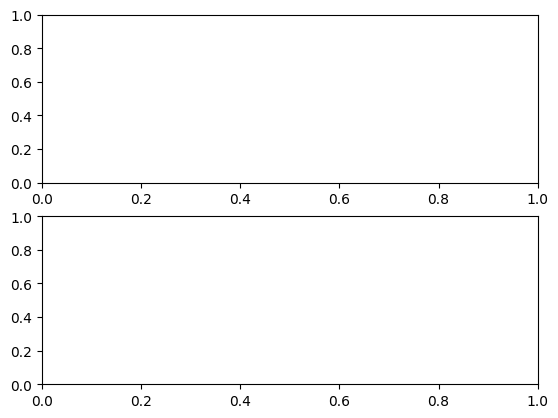

In [13]:
ep.pp.knn_impute(adata)
ep.pp.log_norm(adata, offset=1)
ep.pp.neighbors(adata, method="gauss")
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.tl.diffmap(adata, n_comps=10)

adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden_0_5"] == "0")[0]

ep.tl.dpt(adata, n_branchings=3)
ep.pl.dpt_groups_pseudotime(adata, show=False)

In [ ]:
# plt.gcf().savefig(f"{_TEST_IMAGE_PATH}/dpt_groups_pseudotime_expected.png", dpi=80)